In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

#### Accident Dataframe

In [2]:
accidents = pd.read_csv('Accident_Information.csv')
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 2047256 
Columns: 34


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


#### Vehicle Dataframe

In [4]:
vehicles = pd.read_csv('Vehicle_Information.csv', encoding='ISO-8859-1')
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 2177205 
Columns: 24


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


##### Convert date information to datetime object

In [59]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format = "%Y-%m-%d")

accidents['Hour'] = accidents['Time'].str[0:2]

accidents['Hour'] = pd.to_numeric(accidents['Hour'])

accidents = accidents.dropna(subset = ['Hour'])

accidents['Hour'] = accidents['Hour'].astype('int')

##### Accidents per month and year

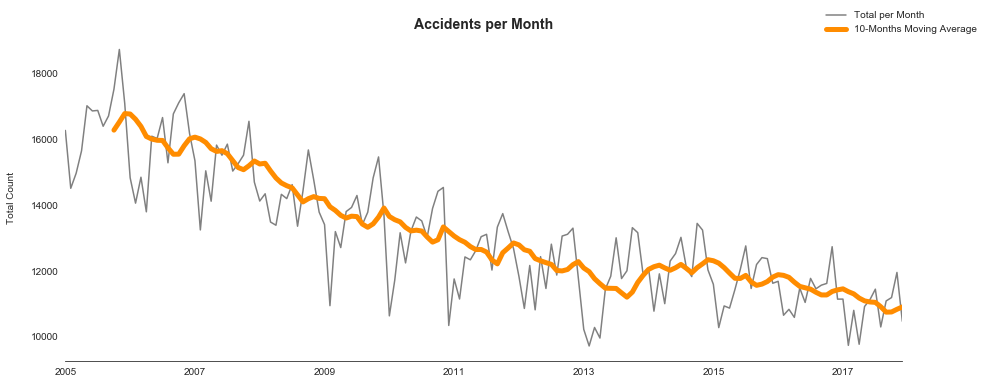

In [87]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

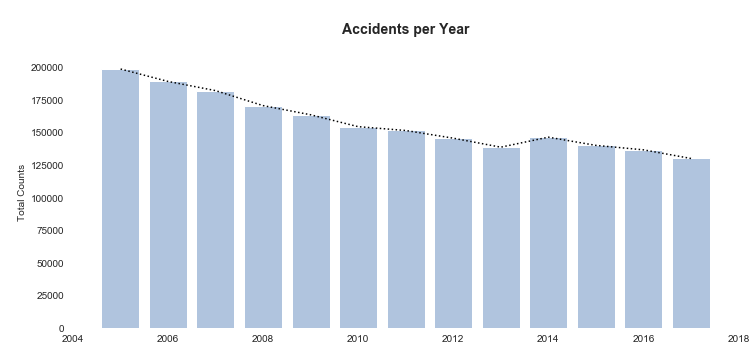

In [92]:
yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lightsteelblue')
ax.plot(yearly_count, linestyle=':', color='black')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

The amount of accidents per year has been gradually been decreasing year by year!

##### Accidents by year and weekdays

In [93]:
weekday_counts = pd.DataFrame(accidents.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
#weekday_counts

weekday = weekday_counts['Date'].dt.weekday_name
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)
weekday_averages

,Average_Accidents
Weekday,
Friday,494.345133
Monday,428.410029
Saturday,402.254786
Sunday,331.821797
Thursday,454.595870
Tuesday,451.721239
Wednesday,455.089971


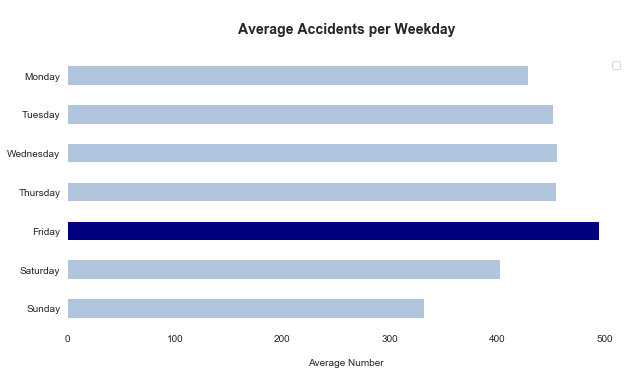

In [94]:
# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 
        'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

Friday is when the most accidents occur

In [95]:
weekday = accidents['Date'].dt.weekday_name
year    = accidents['Date'].dt.year

accident_table = accidents.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2005,21905,26943,32734,29732,30365,29217,27810
2006,21440,25977,31992,28149,28106,27338,26141
2007,20384,24681,29260,27301,27295,26924,26250
2008,18748,23047,27384,24947,25828,26242,24379
2009,17860,22158,26666,24302,24796,24788,22967
2010,16794,20819,25475,22807,23016,23045,22450
2011,16272,20002,24945,23458,22924,22470,21391
2012,15855,19302,23509,22334,21996,21660,20910
2013,14854,18026,23044,21184,20459,21255,19830


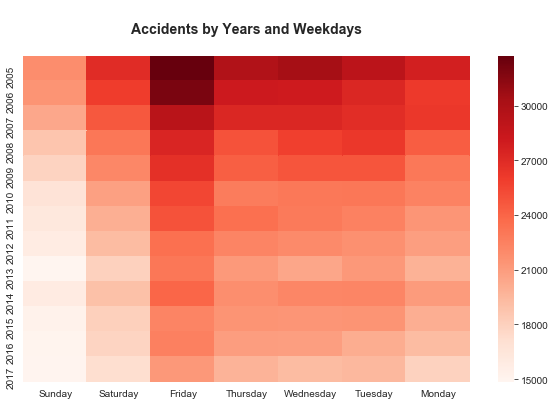

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

Fridays in 2005 were the worst for accidents

##### Weather

In [104]:
#Determine the effect of weather on accidents
accidents.Weather_Conditions.value_counts(normalize = True)

Fine no high winds              0.801123
Raining no high winds           0.116881
Other                           0.021531
Unknown                         0.020765
Raining + high winds            0.013844
Fine + high winds               0.012610
Snowing no high winds           0.006539
Fog or mist                     0.005406
Snowing + high winds            0.001214
Data missing or out of range    0.000085
Name: Weather_Conditions, dtype: float64

A large majority of the datapoints are when the weather is fine

##### Accident severity

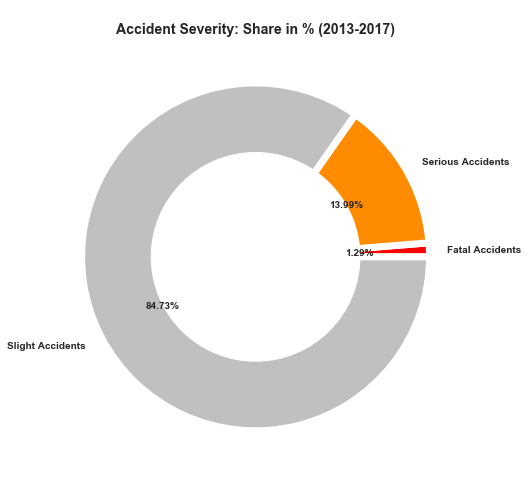

In [113]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()['Fatal']
serious = accidents.Accident_Severity.value_counts()['Serious']
slight  = accidents.Accident_Severity.value_counts()['Slight']

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]


# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

In [109]:
accidents.Accident_Severity.value_counts()

Slight     1734422
Serious     286311
Fatal        26367
Name: Accident_Severity, dtype: int64

###### Trend of fatalities as time passes

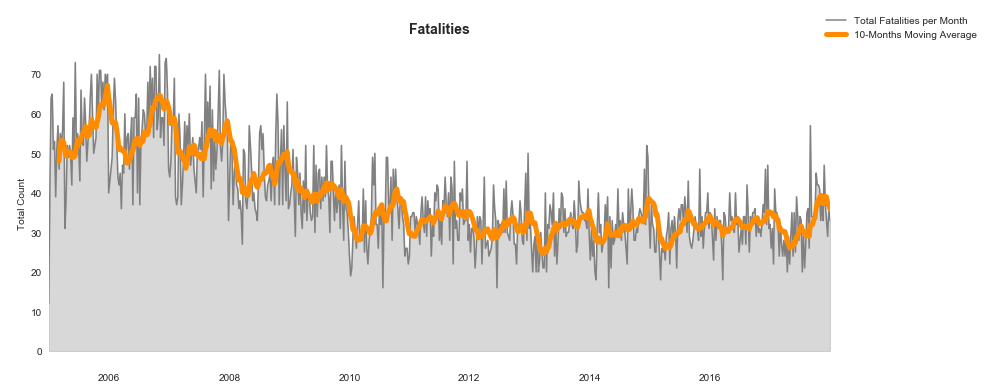

In [115]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']=='Fatal'
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='grey', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='grey', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

Fatalities generally decreasing

##### Distribution of accidents thought the day

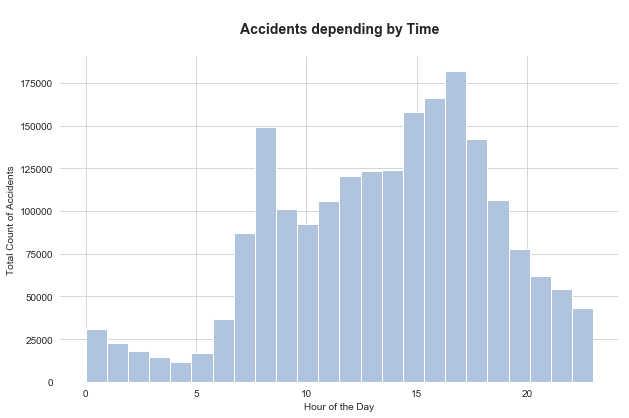

In [116]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
accidents.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents depending by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

There are peaks during morning and afternoon rush hours with the majority of accidents being in the afternoon rush hour.

## Vehicles and drivers

In [117]:
vehicles.Sex_of_Driver.value_counts(normalize=True)

Male                            0.674296
Female                          0.290742
Not known                       0.034931
Data missing or out of range    0.000031
Name: Sex_of_Driver, dtype: float64

In [142]:
# create a new dataframe
drivers = vehicles.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == 'Data missing or out of range') | \
                     (drivers['Sex_of_Driver'] == 'Not known') | \
                     (drivers['Sex_of_Driver'] == 'Data missing or out of range') | \
                     (drivers['Age_Band_of_Driver'] == '6 - 10')]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']
drivers

,Age_Band_of_Driver,Sex_of_Driver,Count
0,0 - 5,Female,27
1,0 - 5,Male,94
3,11 - 15,Female,399
4,11 - 15,Male,3254
6,16 - 20,Female,53326
7,16 - 20,Male,122115
10,21 - 25,Female,79778
11,21 - 25,Male,158333
14,26 - 35,Female,141470
15,26 - 35,Male,306282


I don't know why there are drivers between 0-5

##### Accidents by Age and Sex

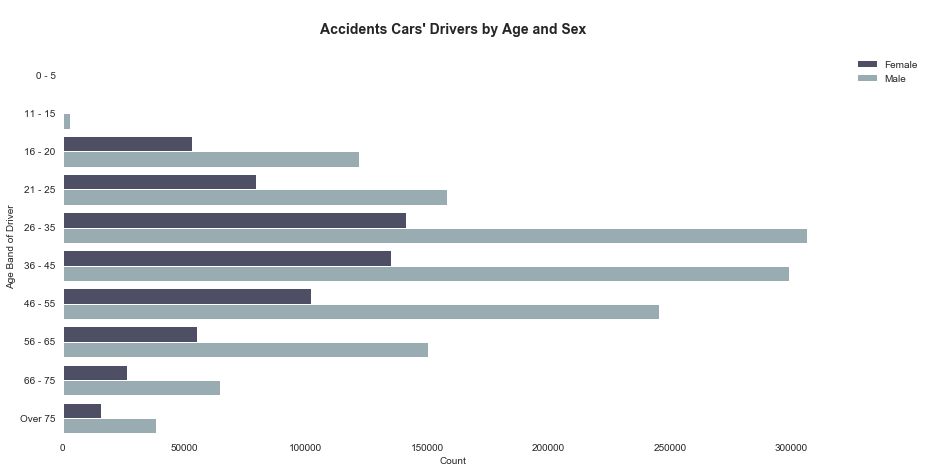

In [143]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='bone')
ax.set_title('\nAccidents Cars\' Drivers by Age and Sex\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);


Most accidents occur between 26 and 45

##### Vehicle manouvre 

In [150]:
# prepare dataframe
df_plot = vehicles.groupby('Vehicle_Manoeuvre').size()\
                                               .reset_index(name='counts')\
                                               .sort_values(by='counts', ascending=False)
                                                        
df_plot = df_plot[df_plot.counts > 80000]
df_plot

,Vehicle_Manoeuvre,counts
4,Going ahead other,994636
14,Turning right,216201
12,Slowing or stopping,177548
16,Waiting to go - held up,155643
5,Going ahead right-hand bend,90893
10,Parked,88354
6,Moving off,87295


A huge amount of accidents was caused by  overtaking